In [6]:
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import scipy.optimize as optimize
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':8})

In [7]:
Kt = 0.146
c = 122.5979
d = 0.502
a = 18.84
h0 = 32

In [8]:
phi = sp.symbols('phi',real = True)
p = sp.symbols('p',real = True)
u = h0 - sp.sqrt(a*a+h0*h0-4*a*a*sp.sin(np.pi/6+phi/2)*sp.sin(np.pi/6+phi/2))
# du_dphi = sp.diff(u,phi)
# print(du_dphi)
U = 0.5*Kt*phi*phi + c*u**(d+1)/(d+1)
dU_dphi = sp.diff(U,phi)
# print(dU_dphi)
MQh = sp.Matrix([a*(sp.cos(phi + np.pi/3) - 1), a*sp.sin(phi + np.pi/3), h0-u])
MRh = sp.Matrix([a*(sp.cos(phi + 2*np.pi/3) - 1), a*sp.sin(phi + 2*np.pi/3), h0-u])
MGh = sp.Matrix([-a, 0, (h0-u)/2])
MPh = sp.Matrix([a*(np.cos(np.pi/3) - 1), a*np.sin(np.pi/3), 0])

V1 = sp.Abs(MQh.cross(MRh).dot(MGh))
V2 = sp.Abs(MPh.cross(MRh).dot(MGh))
V3 = np.sqrt(3)/2 * (h0 - u) *a**2
V = V1 + V2 + V3 - 18.84*36.95* - np.cos(104.48)*6*1.5
dV_dphi = sp.diff(V,phi)
equation = p*dV_dphi - dU_dphi
print(equation)

p*(((sqrt((sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229)/sign(sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229))*(354.9456*(18.84*cos(phi + 1.0471975511966) - 18.84)*sin(phi + 2.0943951023932) - 354.9456*(18.84*cos(phi + 2.0943951023932) - 18.84)*sin(phi + 1.0471975511966))*sin(atan2(0, 0.971237282558229 - sin(phi/2 + 0.523598775598299)**2)/2) - 13374.350208*sqrt((sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229)/sign(sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229))*sin(phi + 1.0471975511966)*sin(atan2(0, 0.971237282558229 - sin(phi/2 + 0.523598775598299)**2)/2) + 13374.350208*sqrt((sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229)/sign(sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229))*sin(phi + 2.0943951023932)*sin(atan2(0, 0.971237282558229 - sin(phi/2 + 0.523598775598299)**2)/2))*(sqrt((sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229)/sign(sin(phi/2 + 0.523598775598299)**2 - 0.971237282558229))*(354.9456*(18.84*cos(phi + 1.0471975511966) - 

In [9]:
angle1 = np.array([9.73,17.58,29.95,41.89,50.58,57.65,62.47,67.63,71.76,75.02,78.85])-9.73
angle2 = np.array([9.91,18.78,31.1,43.4,52.68,59.35,64.36,68.52,72.58,76.32,78.62])-9.91
angle3 = np.array([9.95,18.8,31.05,43.35,52.65,58.88,63.95,68.77,72.78,75.6,78.93])-9.95
angle4 = np.array([10,19.27,32.83,44.41,53.68,59.59,64.92,69.09,72.4,76.63,78.84])-10
angle5 = np.array([9.97,19.31,31.86,44.25,53.22,58.99,64.91,68.88,72.96,76.41,78.51])-9.97
angle = (angle1+angle2+angle3+angle4+angle5)/5

P0 = np.array([0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0])
angle0 = angle
Force0 = np.array([0,0,0,0,0,0,0,0,0,0,0])

angle1 = np.array([8.5,15.1,25.75,37,46.3,53.6,59.2,63.9,69.2])-10
P1 = np.array([0,4.7,10.2,15.2,20.1,25.2,30,35.3,40.4])
Force1 = np.array([100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5])

angle2 = np.array([6.8,12.7,21.56,32.7,43,50.6,56.2,61.43,65.45])-10
P2 = np.array([0,5.2,10,15.1,20.2,25.2,30.1,34.9,40.2])
Force2 = np.array([200,200,200,200,200,200,200,200,200])

angle3 = np.array([5.3,9.5,17.82,28.6,38,46.2,52.1,57.65,62.2])-10
P3 = np.array([0,5,10.1,15.2,20.1,25.2,30.1,35.3,40.2])
Force3 = np.array([301.2,301.2,301.2,301.2,301.2,301.2,301.2,301.2,301.2])

angle4 = np.array([3.82,7.95,15.65,24.65,34,42,48.8,54.6,59.3])-10
P4 = np.array([0,5.1,10.2,15.2,20.3,25,30.1,35.4,40.1])
Force4 = np.array([405.9,405.9,405.9,405.9,405.9,405.9,405.9,405.9,405.9])

angle5 = np.array([1.9,5.7,12.26,20.5,29.8,38.1,45.2,51,55.6])-10
P5 = np.array([0,5.1,10.2,15.2,20.2,25.2,30.2,35.4,40.2])
Force5 = np.array([502,502,502,502,502,502,502,502,502])

angle6 = np.array([0.89,4.3,10.5,17.5,26.3,34.4,41.4,47.6,52.7])-10
P6 = np.array([0,5.1,10.5,15.2,20.4,25.1,30.1,35.1,40.3])
Force6 = np.array([602,602,602,602,602,602,602,602,602])

angle7 = np.array([9.7,13,17.7,24.75,32.5,40.25,48.1,54.2,59.1])-20
P7 = np.array([0,5.1,10.1,14.8,20.3,25,30.3,35.3,40.2])
Force7 = np.array([700.2,700.2,700.2,700.2,700.2,700.2,700.2,700.2,700.2])

angle8 = np.array([8.66,11.62,15.7,21.5,28.85,37,44.4,50.7,55.6])-20
P8 = np.array([0,5,10.1,15.1,20.3,25.3,30.1,35.3,40.2])
Force8 = np.array([799.6,799.6,799.6,799.6,799.6,799.6,799.6,799.6,799.6])

angle9 = np.array([7.52,10.1,13.8,18.2,25.15,32.3,40.4,46.5,51.7])-20
P9 = np.array([0,5.2,10.3,15.4,20.4,25.2,30.5,35.2,40.2])
Force9 = np.array([904,904,904,904,904,904,904,904,904])

angle10 = np.array([6.6,8.95,12.4,17.65,23,29.45,36.3,43.25,48.45])-20
P10 = np.array([0,5.1,10.3,15.4,20.2,25.3,30.2,35.5,40.1])
Force10 = np.array([999.8,999.8,999.8,999.8,999.8,999.8,999.8,999.8,999.8])

angle11 = np.array([5.5,7.45,10.85,14.3,20.1,25.8,32.62,39,44])-20
P11 = np.array([0,5.1,10.3,15.3,20.3,25.2,30.1,35.3,40.1])
Force11 = np.array([1104.1,1104.1,1104.1,1104.1,1104.1,1104.1,1104.1,1104.1,1104.1])

angle12 = np.array([3.82,5.85,8.55,12.2,17.25,22.9,28.6,35.05,40.35])-20
P12 = np.array([0,5,10.2,15,20.3,25.1,30.3,35.3,40.3])
Force12 = np.array([1200.5,1200.5,1200.5,1200.5,1200.5,1200.5,1200.5,1200.5,1200.5])

angle13 = np.array([3.32,5.1,7.5,10.65,15.45,20.1,25.5,31.3,35.85])-20
P13 = np.array([0,5.0,10.3,15.2,20.3,25.4,30.2,35.3,40])
Force13 = np.array([1301.7,1301.7,1301.7,1301.7,1301.7,1301.7,1301.7,1301.7,1301.7])

angle14 = np.array([2.4,4.12,6.45,9.55,12.1,17.5,21.6,26.5,31.3])-20
P14 = np.array([0,5,10.4,15.4,20.2,25,30.2,35.2,40.1])
Force14 = np.array([1405,1405,1405,1405,1405,1405,1405,1405,1405])

angle15 = np.array([2,3.45,5.4,8.33,10.7,14.1,18.7,23.4,28.1])-20
P15 = np.array([0,5.2,10.1,15.4,20.3,25.1,30.3,35.2,40.3])
Force15 = np.array([1499,1499,1499,1499,1499,1499,1499,1499,1499])

Pressure=np.concatenate((P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15))*1000
Angle=np.concatenate((angle0,angle1,angle2,angle3,angle4,angle5,angle6,angle7,angle8,angle9,angle10,angle11,angle12,angle13,angle14,angle15))/180*np.pi
Torque=np.concatenate((Force0,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15))/100*19/2/1000
print(Pressure.shape)
print(Angle.shape)
print(Torque.shape)

(146,)
(146,)
(146,)


(10, 10)
(10, 10)
0
1
2
3
4
5
6
7
8
9


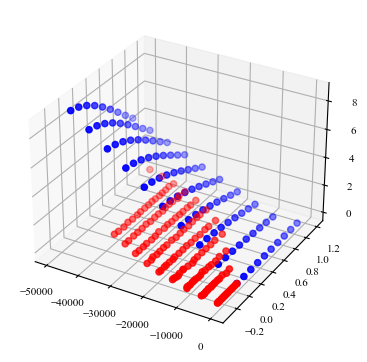

In [10]:
n_p = 10
n_a = 10
Pre = np.linspace(0, -50000 , n_p)

ang = np.linspace(0 , np.pi/3, n_a)

X, Y = np.meshgrid(Pre,ang)
print(X.shape)
print(Y.shape)
Z = np.zeros_like(X)
for i in range(n_p):
    print(i)
    for j in range(n_a):
        Z[i,j] = equation.subs({p:X[i,j],phi:Y[i,j]}).evalf()

fig=plt.figure(figsize=(8.49 / 2.54, 8.49 / 2.54))
ax1 = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax1)

# ax1 = plt.figure().add_subplot(projection='3d')
ax1.scatter3D(-Pressure,Angle,Torque,c='r')
ax1.scatter3D(X , Y, Z, c="b")
